In [165]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [166]:
source = 'E:/Analytics Labs/python_CaseStudy/Python Foundation End to End Case Study E-Commerce Analytics Project/'
Customers = pd.read_csv(source+'CUSTOMERS.csv')
Sellers = pd.read_csv(source+'SELLERS.csv')
Products = pd.read_csv(source+'PRODUCTS.csv')
Orders = pd.read_csv(source+'ORDERS.csv')
Order_Items = pd.read_csv(source+'ORDER_ITEMS.csv')
Order_Payments = pd.read_csv(source+'ORDER_PAYMENTS.csv')
Order_Review_Ratings = pd.read_csv(source+'ORDER_REVIEW_RATINGS.csv')
Geo_Location = pd.read_csv(source+'GEO_LOCATION.csv')

In [167]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

In [168]:
# Create Data audit Report for categorical variables
def categorical_var_summary( x ):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100 / x.count(), 2)], 
                     
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [169]:
Customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [170]:
Customers.customer_zip_code_prefix = Customers.customer_zip_code_prefix.astype('category')

In [171]:
Customers_cont_vars = Customers.loc[:, (Customers.dtypes == 'float64')|(Customers.dtypes == 'int64')]
Customers_cat_vars = Customers.loc[:, (Customers.dtypes == 'object')]

In [172]:
Customers_cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
customer_id,99441,0,3327a56e01d175d6a2885ae4452638ec,1,0.0
customer_unique_id,99441,0,8d50f5eadf50201ccdcedfb9e2ac8455,17,0.02
customer_city,99441,0,Akkarampalle,15540,15.63
customer_state,99441,0,Andhra Pradesh,60688,61.03


In [173]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               99441 non-null  object  
 1   customer_unique_id        99441 non-null  object  
 2   customer_zip_code_prefix  99441 non-null  category
 3   customer_city             99441 non-null  object  
 4   customer_state            99441 non-null  object  
dtypes: category(1), object(4)
memory usage: 3.8+ MB


In [174]:
Sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh


In [175]:
Sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [176]:
Sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2225
seller_city                534
seller_state                19
dtype: int64

In [177]:
Sellers.seller_zip_code_prefix = Sellers.seller_zip_code_prefix.astype('category')

In [178]:
Sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   seller_id               3095 non-null   object  
 1   seller_zip_code_prefix  3095 non-null   category
 2   seller_city             3038 non-null   object  
 3   seller_state            3038 non-null   object  
dtypes: category(1), object(3)
memory usage: 160.6+ KB


In [179]:
Sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2225
seller_city                534
seller_state                19
dtype: int64

In [180]:
Sellers_cont_vars = Sellers.loc[:, (Sellers.dtypes == 'float64')|(Sellers.dtypes == 'int64')]
Sellers_cat_vars = Sellers.loc[:, (Sellers.dtypes == 'object')]

In [181]:
Sellers_cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
seller_id,3095,0,3a52d63a8f9daf5a28f3626d7eb9bd28,1,0.03
seller_city,3038,57,Akkarampalle,699,23.01
seller_state,3038,57,Andhra Pradesh,2060,67.81


In [182]:
Products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [183]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [184]:
Products.nunique()

product_id                    32951
product_category_name            71
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [185]:
Products_cont_vars = Products.loc[:, (Products.dtypes == 'float64')|(Products.dtypes == 'int64')]
Products_cat_vars = Products.loc[:, (Products.dtypes == 'object')]

In [186]:
Products_cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
product_id,32951,0,bad5bc36e62c12c840045474c6dbe021,1,0.0
product_category_name,32328,623,Bed_Bath_Table,3029,9.37


In [187]:
Products_cont_vars.apply(continuous_var_summary)

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
dtype,float64,float64,float64,float64,float64,float64,float64
cardinality,66,2960,19,2204,99,102,95
n_tot,32951,32951,32951,32951,32951,32951,32951
n,32341,32341,32341,32949,32949,32949,32949
nmiss,610,610,610,2,2,2,2
perc_miss,1.851234,1.851234,1.851234,0.00607,0.00607,0.00607,0.00607
sum,1567793.0,24950929.0,70794.0,75007492.0,1015326.0,558079.0,764309.0
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
var,104.975203,403371.348563,3.016355,18335855.693593,286.098891,185.982881,145.903387


In [188]:
Orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [189]:
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [190]:
Orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         88789
order_approved_at                50462
order_delivered_carrier_date     61544
order_delivered_customer_date    75649
order_estimated_delivery_date      459
dtype: int64

In [191]:
Orders_cont_vars = Orders.loc[:, (Orders.dtypes == 'float64')|(Orders.dtypes == 'int64')]
Orders_cat_vars = Orders.loc[:, (Orders.dtypes == 'object')]

In [192]:
Orders_cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
order_id,99441,0,d7c88b34559c799b7170fb42a1222ab7,1,0.0
customer_id,99441,0,df7eca384a2355c9094734f3db37c0b6,1,0.0
order_status,99441,0,delivered,96478,97.02
order_purchase_timestamp,99441,0,8/2/2018 12:06,28,0.03
order_approved_at,99281,160,1/10/2018 10:32,109,0.11
order_delivered_carrier_date,97658,1783,5/9/2018 15:48,47,0.05
order_delivered_customer_date,96476,2965,12/11/2017 18:52,7,0.01
order_estimated_delivery_date,99441,0,12/20/2017 0:00,522,0.52


In [193]:
Orders.order_purchase_timestamp = pd.to_datetime(Orders.order_purchase_timestamp)
Orders.order_approved_at = pd.to_datetime(Orders.order_approved_at)
Orders.order_delivered_carrier_date = pd.to_datetime(Orders.order_delivered_carrier_date)
Orders.order_delivered_customer_date = pd.to_datetime(Orders.order_delivered_customer_date)
Orders.order_estimated_delivery_date = pd.to_datetime(Orders.order_estimated_delivery_date)

In [194]:
Order_Items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72


In [195]:
Order_Items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [196]:
Order_Items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    54615
price                   5968
freight_value           6999
dtype: int64

In [197]:
Order_Items_cont_vars = Order_Items.loc[:, (Order_Items.dtypes == 'float64')|(Order_Items.dtypes == 'int64')]
Order_Items_cat_vars = Order_Items.loc[:, (Order_Items.dtypes == 'object')]

In [198]:
Order_Items_cont_vars.apply(continuous_var_summary)

,order_item_id,price,freight_value
dtype,int64,float64,float64
cardinality,21,5968,6999
n_tot,112650,112650,112650
n,112650,112650,112650
nmiss,0,0,0
perc_miss,0.0,0.0,0.0
sum,134936,13591643.7,2251909.54
mean,1.197834,120.653739,19.99032
std,0.705124,183.633928,15.806405
var,0.4972,33721.419531,249.842452


In [199]:
Order_Items_cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
order_id,112650,0,8272b63d03f5f79c56e9e4120aec44ef,21,0.02
product_id,112650,0,aca2eb7d00ea1a7b8ebd4e68314663af,527,0.47
seller_id,112650,0,6560211a19b47992c3666cc44a7e94c0,2033,1.8
shipping_limit_date,112650,0,2/27/2018 3:31,55,0.05


In [200]:
Order_Payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [201]:
Order_Payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [202]:
Order_Payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [203]:
Order_Review_Ratings

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26
...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,12/9/2017 0:00,12/11/2017 20:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,3/22/2018 0:00,3/23/2018 9:10
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,7/1/2018 0:00,7/2/2018 12:59
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,12/15/2017 0:00,12/16/2017 1:29


In [204]:
Order_Review_Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [205]:
Order_Review_Ratings.nunique()

review_id                  99173
order_id                   99441
review_score                   5
review_creation_date         637
review_answer_timestamp    89500
dtype: int64

In [206]:
Order_Review_Ratings.review_creation_date = pd.to_datetime(Order_Review_Ratings.review_creation_date)
Order_Review_Ratings.review_answer_timestamp = pd.to_datetime(Order_Review_Ratings.review_answer_timestamp)

In [207]:
Geo_Location

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh
...,...,...,...,...,...
19010,99955,-28.107588,-52.144019,Ghaziabad,Uttar Pradesh
19011,99970,-28.345143,-51.876926,Vadugapatti,Tamil Nadu
19012,99910,-27.863500,-52.084760,Akkarampalle,Andhra Pradesh
19013,99920,-27.858716,-52.300403,Kolkata,West Bengal


In [208]:
Geo_Location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [209]:
Geo_Location.nunique()

geolocation_zip_code_prefix    19015
geolocation_lat                18987
geolocation_lng                18988
geolocation_city                3809
geolocation_state                 20
dtype: int64

In [210]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               99441 non-null  object  
 1   customer_unique_id        99441 non-null  object  
 2   customer_zip_code_prefix  99441 non-null  category
 3   customer_city             99441 non-null  object  
 4   customer_state            99441 non-null  object  
dtypes: category(1), object(4)
memory usage: 3.8+ MB


In [211]:
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [212]:
Order_Payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [213]:
cust_Orders = pd.merge(left = Customers,
                   right = Orders, 
                   on = "customer_id",
                   how = "inner"
                  )
cust_Orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  category      
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

In [214]:
cust_Orders.nunique()

customer_id                      99441
customer_unique_id               96096
customer_zip_code_prefix         14994
customer_city                     4119
customer_state                      20
order_id                         99441
order_status                         8
order_purchase_timestamp         88789
order_approved_at                50462
order_delivered_carrier_date     61544
order_delivered_customer_date    75649
order_estimated_delivery_date      459
dtype: int64

In [215]:
cust_Ord_item = pd.merge(left = cust_Orders,
                        right = Order_Items, 
                        on = "order_id",
                        how = "inner"
                        )
cust_Ord_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112650 non-null  object        
 1   customer_unique_id             112650 non-null  object        
 2   customer_zip_code_prefix       112650 non-null  category      
 3   customer_city                  112650 non-null  object        
 4   customer_state                 112650 non-null  object        
 5   order_id                       112650 non-null  object        
 6   order_status                   112650 non-null  object        
 7   order_purchase_timestamp       112650 non-null  datetime64[ns]
 8   order_approved_at              112635 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 10  order_delivered_customer_date  110196 non-null  datetime64[ns]
 11  

In [216]:
cust_Ord_item_pay = pd.merge(left = cust_Ord_item,
                        right = Order_Payments, 
                        on = "order_id",
                        how = "inner"
                        )
cust_Ord_item_pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    117601 non-null  object        
 1   customer_unique_id             117601 non-null  object        
 2   customer_zip_code_prefix       117601 non-null  category      
 3   customer_city                  117601 non-null  object        
 4   customer_state                 117601 non-null  object        
 5   order_id                       117601 non-null  object        
 6   order_status                   117601 non-null  object        
 7   order_purchase_timestamp       117601 non-null  datetime64[ns]
 8   order_approved_at              117586 non-null  datetime64[ns]
 9   order_delivered_carrier_date   116356 non-null  datetime64[ns]
 10  order_delivered_customer_date  115034 non-null  datetime64[ns]
 11  

In [217]:
Order_Review_Ratings.nunique()

review_id                  99173
order_id                   99441
review_score                   5
review_creation_date         637
review_answer_timestamp    89500
dtype: int64

In [218]:
cust_Ord_item_pay_rat = pd.merge(left = cust_Ord_item_pay,
                        right = Order_Review_Ratings, 
                        on = "order_id",
                        how = "inner"
                        )
cust_Ord_item_pay_rat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118315 non-null  object        
 1   customer_unique_id             118315 non-null  object        
 2   customer_zip_code_prefix       118315 non-null  category      
 3   customer_city                  118315 non-null  object        
 4   customer_state                 118315 non-null  object        
 5   order_id                       118315 non-null  object        
 6   order_status                   118315 non-null  object        
 7   order_purchase_timestamp       118315 non-null  datetime64[ns]
 8   order_approved_at              118300 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117061 non-null  datetime64[ns]
 10  order_delivered_customer_date  115727 non-null  datetime64[ns]
 11  

In [219]:
cust_Ord_item_pay_rat_product = pd.merge(left = cust_Ord_item_pay_rat,
                        right = Products, 
                        on = "product_id",
                        how = "inner"
                        )
cust_Ord_item_pay_rat_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118315 non-null  object        
 1   customer_unique_id             118315 non-null  object        
 2   customer_zip_code_prefix       118315 non-null  category      
 3   customer_city                  118315 non-null  object        
 4   customer_state                 118315 non-null  object        
 5   order_id                       118315 non-null  object        
 6   order_status                   118315 non-null  object        
 7   order_purchase_timestamp       118315 non-null  datetime64[ns]
 8   order_approved_at              118300 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117061 non-null  datetime64[ns]
 10  order_delivered_customer_date  115727 non-null  datetime64[ns]
 11  

In [220]:
Sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   seller_id               3095 non-null   object  
 1   seller_zip_code_prefix  3095 non-null   category
 2   seller_city             3038 non-null   object  
 3   seller_state            3038 non-null   object  
dtypes: category(1), object(3)
memory usage: 160.6+ KB


In [221]:
final = pd.merge(left = cust_Ord_item_pay_rat_product,
                right = Sellers, 
                on = "seller_id",
                how = "inner")
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118315 non-null  object        
 1   customer_unique_id             118315 non-null  object        
 2   customer_zip_code_prefix       118315 non-null  category      
 3   customer_city                  118315 non-null  object        
 4   customer_state                 118315 non-null  object        
 5   order_id                       118315 non-null  object        
 6   order_status                   118315 non-null  object        
 7   order_purchase_timestamp       118315 non-null  datetime64[ns]
 8   order_approved_at              118300 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117061 non-null  datetime64[ns]
 10  order_delivered_customer_date  115727 non-null  datetime64[ns]
 11  

In [222]:
Geo_Location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


# 1. Perform Detailed exploratory analysis
# a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…) 

In [223]:
print('Total Revenue :',round(final.price.sum(),2))

Total Revenue : 14274826.26


In [224]:
print('Total products :', final.product_id.nunique())

Total products : 32951


In [225]:
print('Total quantity :', final.product_id.count())

Total quantity : 118315


In [226]:
print('Total categories :', final.product_category_name.nunique())

Total categories : 71


In [227]:
print('Total sellers :', final.seller_id.nunique())

Total sellers : 3095


In [228]:
print('Total locations :', Geo_Location.geolocation_zip_code_prefix.nunique())

Total locations : 19015


In [229]:
print('Total Payment Methods :', final.payment_type.nunique())

Total Payment Methods : 4


# 1.b. Understanding how many new customers acquired every month

In [230]:
final['Monthly'] = final['order_purchase_timestamp'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
final['Yearly'] = final['order_purchase_timestamp'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [231]:
month_cust = final[['customer_id','Monthly','Yearly','order_purchase_timestamp']]
month_cust

,customer_id,Monthly,Yearly,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,May,2017,2017-05-16 15:05:00
1,8912fc0c3bbf1e2fbf35819e21706718,November,2017,2017-11-09 00:50:00
2,8912fc0c3bbf1e2fbf35819e21706718,November,2017,2017-11-09 00:50:00
3,f0ac8e5a239118859b1734e1087cbb1f,May,2017,2017-05-07 20:11:00
4,6bc8d08963a135220ed6c6d098831f84,February,2018,2018-02-03 19:45:00
...,...,...,...,...
118310,eda10d7eb51a675d000956fa1aabc7dd,August,2018,2018-08-01 18:58:00
118311,f0f671d4034e98cdf20f0c452d6db02b,August,2018,2018-08-20 12:37:00
118312,b90b857a277b080d8078332b3636ab58,August,2018,2018-08-18 20:59:00
118313,1ed0c832c2dd99570a59260e71768bdf,November,2017,2017-11-14 12:04:00


In [232]:
month_cust.sort_values( 'order_purchase_timestamp' , inplace=True , ignore_index=True )
month_cust

<ipython-input-232-fbc19ae0218f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_cust.sort_values( 'order_purchase_timestamp' , inplace=True , ignore_index=True )


,customer_id,Monthly,Yearly,order_purchase_timestamp
0,08c5351a6aca1c1589a38f244edeee9d,September,2016,2016-09-04 21:15:00
1,08c5351a6aca1c1589a38f244edeee9d,September,2016,2016-09-04 21:15:00
2,683c54fc24d40ee9f8a6fc179fd9856c,September,2016,2016-09-05 00:15:00
3,b106b360fe2ef8849fbbd056f777b4d5,October,2016,2016-10-02 22:07:00
4,355077684019f7f60a031656bd7262b8,October,2016,2016-10-03 09:44:00
...,...,...,...,...
118310,e60df9449653a95af4549bbfcb18a6eb,August,2018,2018-08-29 14:18:00
118311,6e353700bc7bcdf6ebc15d6de16d7002,August,2018,2018-08-29 14:18:00
118312,496630b6740bcca28fce9ba50d8a26ef,August,2018,2018-08-29 14:52:00
118313,898b7fee99c4e42170ab69ba59be0a8b,August,2018,2018-08-29 15:00:00


In [233]:
month_cust.drop_duplicates( subset ="customer_id", keep = 'first', inplace = True, ignore_index=True)
month_cust

<ipython-input-233-f82ad6a34dc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_cust.drop_duplicates( subset ="customer_id", keep = 'first', inplace = True, ignore_index=True)


,customer_id,Monthly,Yearly,order_purchase_timestamp
0,08c5351a6aca1c1589a38f244edeee9d,September,2016,2016-09-04 21:15:00
1,683c54fc24d40ee9f8a6fc179fd9856c,September,2016,2016-09-05 00:15:00
2,b106b360fe2ef8849fbbd056f777b4d5,October,2016,2016-10-02 22:07:00
3,355077684019f7f60a031656bd7262b8,October,2016,2016-10-03 09:44:00
4,7ec40b22510fdbea1b08921dd39e63d8,October,2016,2016-10-03 16:56:00
...,...,...,...,...
98660,e60df9449653a95af4549bbfcb18a6eb,August,2018,2018-08-29 14:18:00
98661,6e353700bc7bcdf6ebc15d6de16d7002,August,2018,2018-08-29 14:18:00
98662,496630b6740bcca28fce9ba50d8a26ef,August,2018,2018-08-29 14:52:00
98663,898b7fee99c4e42170ab69ba59be0a8b,August,2018,2018-08-29 15:00:00


In [234]:
order=['January','February','March','April','May','June','July',
       'August','September','October','November','December']

In [235]:
month_cust_gp = month_cust.groupby(['Yearly','Monthly'])[['customer_id']].count().reset_index()
month_cust_gp.head()

,Yearly,Monthly,customer_id
0,2016,December,1
1,2016,October,308
2,2016,September,2
3,2017,April,2391
4,2017,August,4293


In [236]:
month_cust_1= month_cust_gp[month_cust_gp.Yearly=='2016']
month_cust_2= month_cust_gp[month_cust_gp.Yearly=='2017']
month_cust_3= month_cust_gp[month_cust_gp.Yearly=='2018']

In [237]:
month_cust_1.index = pd.CategoricalIndex(data = month_cust_1.Monthly,
                                            categories = order,
                                            ordered = True)
month_cust_1 = month_cust_1.sort_index()

In [238]:
month_cust_2.index = pd.CategoricalIndex(data = month_cust_2.Monthly,
                                            categories = order,
                                            ordered = True)
month_cust_2 = month_cust_2.sort_index()

In [239]:
month_cust_3.index = pd.CategoricalIndex(data = month_cust_3.Monthly,
                                            categories = order,
                                            ordered = True)
month_cust_3 = month_cust_3.sort_index()

In [240]:
month_cust = pd.concat([month_cust_1,month_cust_2,month_cust_3])

In [241]:
month_cust.reset_index(drop = True)
month_cust.columns = ['Yearly','Monthly','new_customers_per_month']
month_cust

,Yearly,Monthly,new_customers_per_month
Monthly,,,
September,2016,September,2
October,2016,October,308
December,2016,December,1
January,2017,January,789
February,2017,February,1733
March,2017,March,2641
April,2017,April,2391
May,2017,May,3660
June,2017,June,3217


# 1.c. Understand the retention of customers on month on month basis

In [242]:
pvt_final = final.pivot_table(index= 'customer_id',
                  values=['order_purchase_timestamp','order_estimated_delivery_date'] ,
                  aggfunc={'order_purchase_timestamp':'min','order_estimated_delivery_date':'max'})
pvt_final.head()

,order_estimated_delivery_date,order_purchase_timestamp
customer_id,,
00012a2ce6f8dcda20d059ce98491703,2017-12-04,2017-11-14 16:08:00
000161a058600d5901f007fab4c27140,2017-08-04,2017-07-16 09:40:00
0001fd6190edaaf884bcaf3d49edf079,2017-03-22,2017-02-28 11:06:00
0002414f95344307404f0ace7a26f1d5,2017-09-14,2017-08-16 13:09:00
000379cdec625522490c315e70c7a9fb,2018-04-18,2018-04-02 13:42:00


In [243]:
pvt_final['Cohort'] = pvt_final.order_purchase_timestamp.map(lambda x: x.strftime('%Y-%m'))

In [244]:
pvt_final['Lifetime'] = (pvt_final.order_estimated_delivery_date.dt.year - pvt_final.order_purchase_timestamp.dt.year)*12 + (pvt_final.order_estimated_delivery_date.dt.month - pvt_final.order_purchase_timestamp.dt.month)

In [245]:
retention = pvt_final.reset_index().sort_values(['Cohort'])
retention.head(10)

,customer_id,order_estimated_delivery_date,order_purchase_timestamp,Cohort,Lifetime
3329,08c5351a6aca1c1589a38f244edeee9d,2016-10-20,2016-09-04 21:15:00,2016-09,1
40006,683c54fc24d40ee9f8a6fc179fd9856c,2016-10-28,2016-09-05 00:15:00,2016-09,1
41182,6b4acd0818e5852c5271cb061ccbb493,2016-12-08,2016-10-04 15:07:00,2016-10,2
83590,d83a72326816260884edd05238aaa508,2016-12-02,2016-10-06 13:07:00,2016-10,2
45347,75e8f990b9e289013b1d092614b52487,2016-11-24,2016-10-04 21:54:00,2016-10,1
41262,6b79d5d9914b88e0e05a19e76dfe926b,2016-11-29,2016-10-05 17:09:00,2016-10,1
23842,3dc7eb6da6c008460353d9a171e8fe6d,2016-11-28,2016-10-04 17:25:00,2016-10,1
45418,7615536f9443d90e9971a9002fd9abf5,2016-12-05,2016-10-07 16:50:00,2016-10,2
19135,31a4ecf0bd3ea9436b7132bac1a1bdb3,2016-11-28,2016-10-06 13:16:00,2016-10,1
64333,a6d276e9c75cfeb2db5ddec9add0565e,2016-11-29,2016-10-05 20:20:00,2016-10,1


In [246]:
retention = retention.sort_values(by='Lifetime', ascending=False).reset_index()
retention

,index,customer_id,order_estimated_delivery_date,order_purchase_timestamp,Cohort,Lifetime
0,38185,6357fffb5704244d552615bbfcea1442,2017-10-11,2017-05-23 22:28:00,2017-05,5
1,68998,b279a1d441c73c1974d7a63618855aa0,2017-08-08,2017-03-16 02:30:00,2017-03,5
2,64015,a5fbb6579eacbeb02752a143bfe82405,2018-08-03,2018-03-06 09:47:00,2018-03,5
3,19574,32cef4bdd6bfa50612d81dc77a93b131,2018-07-12,2018-02-06 20:44:00,2018-02,5
4,57858,964253ff0e4e08180064764a450e521f,2017-07-04,2017-02-07 18:01:00,2017-02,5
...,...,...,...,...,...,...
98660,15760,28da029822232f74f6920cc4681ff5a8,2017-07-27,2017-07-07 17:28:00,2017-07,0
98661,21197,36d21d1f51cfe61bf8c909d95d93ad3c,2018-04-12,2018-04-01 12:59:00,2018-04,0
98662,24218,3ecddf921de5c14ec1f8bad33216e058,2017-07-21,2017-07-02 00:19:00,2017-07,0
98663,69320,b35f1a8faa9f7afd849b001e0b622972,2017-07-25,2017-07-01 19:23:00,2017-07,0


#### The lifetime column shows the number of months for which the customer is retained with the company (ie. ordering the product)

# 1.d. How the revenues from existing/new customers on month on month basis

In [247]:
month_rev = final[['Monthly','Yearly','price' ]]
month_rev

,Monthly,Yearly,price
0,May,2017,124.99
1,November,2017,112.99
2,November,2017,112.99
3,May,2017,124.99
4,February,2018,106.99
...,...,...,...
118310,August,2018,49.90
118311,August,2018,730.00
118312,August,2018,135.98
118313,November,2017,167.99


In [248]:
order=['January','February','March','April','May','June','July',
       'August','September','October','November','December']

In [249]:
month_rev_gp = month_rev.groupby(['Yearly','Monthly'])[['price']].sum().reset_index()
month_rev_gp.head()

,Yearly,Monthly,price
0,2016,December,10.90
1,2016,October,51468.91
2,2016,September,132.39
3,2017,April,392595.36
4,2017,August,606026.98


In [250]:
month_rev_1= month_rev_gp[month_rev_gp.Yearly=='2016']
month_rev_2= month_rev_gp[month_rev_gp.Yearly=='2017']
month_rev_3= month_rev_gp[month_rev_gp.Yearly=='2018']

In [251]:
month_rev_1.index = pd.CategoricalIndex(data = month_rev_1.Monthly,
                                            categories = order,
                                            ordered = True)
month_rev_1 = month_rev_1.sort_index()

In [252]:
month_rev_2.index = pd.CategoricalIndex(data = month_rev_2.Monthly,
                                            categories = order,
                                            ordered = True)
month_rev_2 = month_rev_2.sort_index()

In [253]:
month_rev_3.index = pd.CategoricalIndex(data = month_rev_3.Monthly,
                                            categories = order,
                                            ordered = True)
month_rev_3 = month_rev_3.sort_index()

In [254]:
month_rev = pd.concat([month_rev_1,month_rev_2,month_rev_3])

In [255]:
month_rev.reset_index(drop = True, inplace=True)
month_rev.columns = ['Yearly', 'Monthly', 'revenue']
month_rev

,Yearly,Monthly,revenue
0,2016,September,132.39
1,2016,October,51468.91
2,2016,December,10.90
3,2017,January,129895.32
4,2017,February,262013.86
5,2017,March,398117.44
6,2017,April,392595.36
7,2017,May,549226.84
8,2017,June,456867.47
9,2017,July,536906.96


# 1.e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [256]:
final.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'Monthly', 'Yearly'],
      dtype='object')

In [257]:
cat = final.groupby(['product_category_name'])[['price','product_id']].agg({'price':'sum','product_id':'count'}).reset_index()
cat.columns = ['Category','Sales','Quantity']
cat

,Category,Sales,Quantity
0,Agro_Industry_And_Commerce,83841.95,252
1,Air_Conditioning,55962.38,302
2,Art,24721.97,219
3,Arts_And_Craftmanship,1814.01,24
4,Audio,52500.27,381
...,...,...,...
66,Stationery,239385.97,2625
67,Tablets_Printing_Image,7840.31,87
68,Telephony,339571.03,4726
69,Toys,501118.39,4281


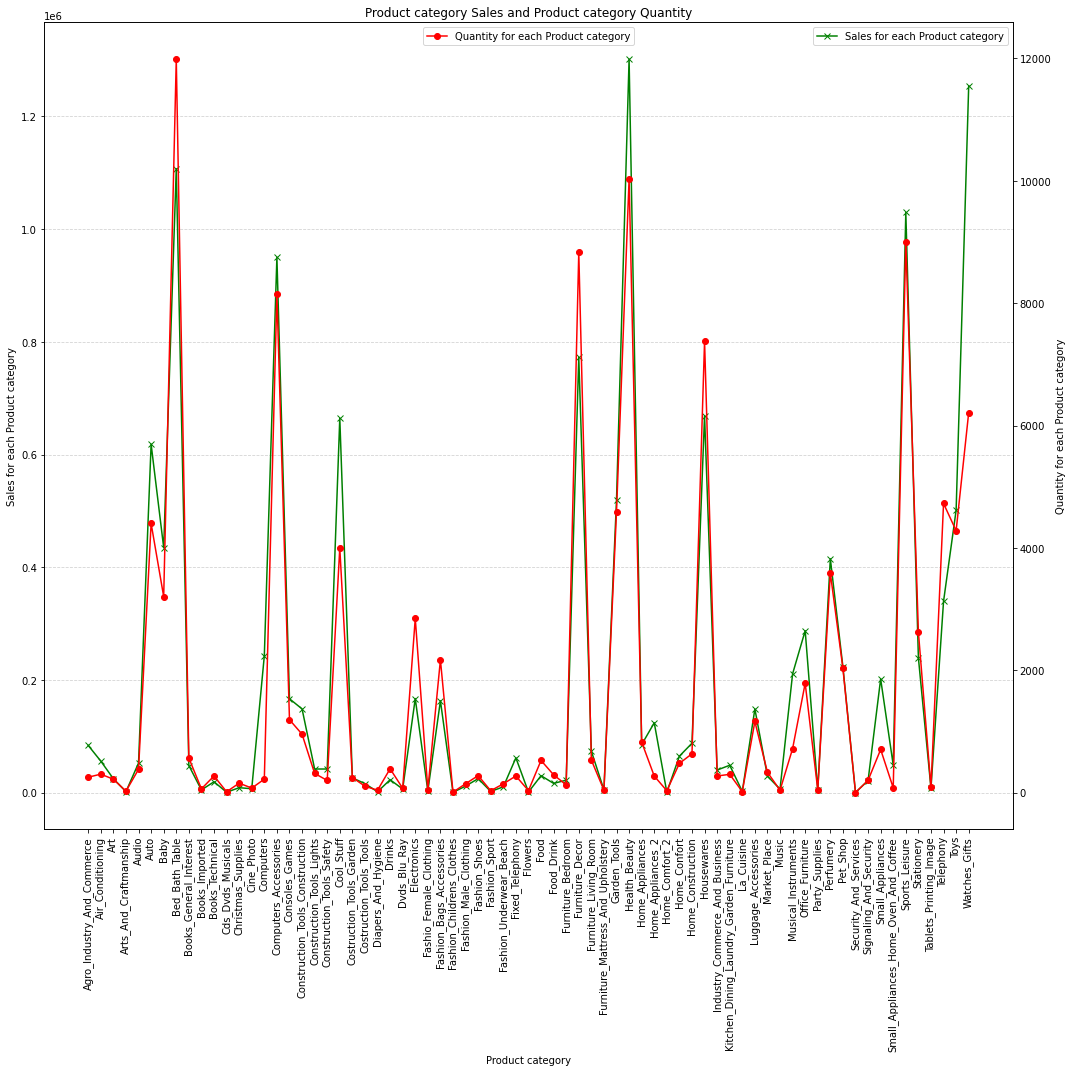

In [258]:
fig, ax = plt.subplots(figsize=(15,15))
ax2 = ax.twinx()
ax.set_title('Product category Sales and Product category Quantity')
ax.set_xlabel('Product category')
ax.plot(cat['Category'], cat['Sales'], color='green', marker='x')
ax2.plot(cat['Category'], cat['Quantity'], color='red', marker='o')
ax.set_ylabel('Sales for each Product category')
ax2.set_ylabel('Quantity for each Product category')
ax.legend(['Sales for each Product category'])
ax2.legend(['Quantity for each Product category'], loc='upper center')
ax.set_xticks(cat['Category'])
ax.set_xticklabels(cat['Category'], rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

In [259]:
locn = final.groupby(['customer_state'])[['price','product_id']].agg({'price':'sum','product_id':'count'}).reset_index()
locn.columns = ['Location','Sales','Quantity']
locn.sort_values('Quantity', inplace=True)
locn

,Location,Sales,Quantity
4,Goa,7.359000e+02,10
18,Uttaranchal,1.363469e+04,110
19,West Bengal,6.191781e+04,427
13,Orissa,1.000603e+05,698
14,Punjab,9.290437e+04,773
7,Himachal Pradesh,1.071177e+05,862
15,Rajasthan,1.291510e+05,923
17,Uttar Pradesh,1.587824e+05,1180
1,Arunachal Pradesh,1.655733e+05,1320
10,Kerala,2.156786e+05,1780


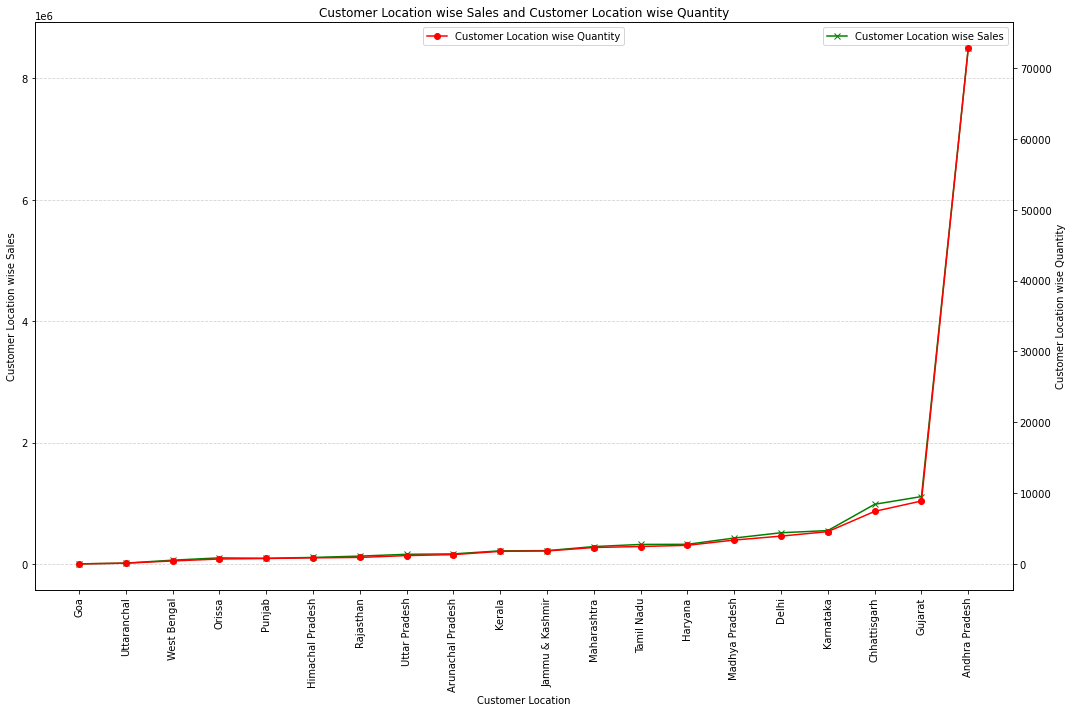

In [260]:
fig, ax = plt.subplots(figsize=(15,10))
ax2 = ax.twinx()
ax.set_title('Customer Location wise Sales and Customer Location wise Quantity')
ax.set_xlabel('Customer Location')
ax.plot(locn['Location'], locn['Sales'], color='green', marker='x')
ax2.plot(locn['Location'], locn['Quantity'], color='red', marker='o')
ax.set_ylabel('Customer Location wise Sales')
ax2.set_ylabel('Customer Location wise Quantity')
ax.legend(['Customer Location wise Sales'])
ax2.legend(['Customer Location wise Quantity'], loc='upper center')
ax.set_xticks(locn['Location'])
ax.set_xticklabels(locn['Location'], rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

### month

In [261]:
mon = final.groupby(['Monthly','Yearly'])[['price','product_id']].agg({'price':'sum','product_id':'count'}).reset_index()
mon.columns = ['Monthly','Yearly','Sales','Quantity']
mon

,Monthly,Yearly,Sales,Quantity
0,April,2017,392595.36,2864
1,April,2018,1031745.62,8273
2,August,2017,606026.98,5224
3,August,2018,884731.52,7464
4,December,2016,10.90,1
5,December,2017,773722.91,6595
6,February,2017,262013.86,2073
7,February,2018,889777.19,8025
8,January,2017,129895.32,1023
9,January,2018,993701.49,8603


In [262]:
#sorting chronologically
order=['January','February','March','April','May','June','July',
       'August','September','October','November','December']

month_rev_1= mon[mon.Yearly=='2016']
month_rev_2= mon[mon.Yearly=='2017']
month_rev_3= mon[mon.Yearly=='2018']
month_rev_1.index = pd.CategoricalIndex(data = month_rev_1.Monthly,
                                            categories = order,
                                            ordered = True)
month_rev_1 = month_rev_1.sort_index()
month_rev_2.index = pd.CategoricalIndex(data = month_rev_2.Monthly,
                                            categories = order,
                                            ordered = True)
month_rev_2 = month_rev_2.sort_index()
month_rev_3.index = pd.CategoricalIndex(data = month_rev_3.Monthly,
                                            categories = order,
                                            ordered = True)
month_rev_3 = month_rev_3.sort_index()
mon_rev = pd.concat([month_rev_1,month_rev_2,month_rev_3])
mon_rev.reset_index(drop = True, inplace=True)
mon_rev.columns = ['Monthly','Yearly','Sales','Quantity']
mon_rev

,Monthly,Yearly,Sales,Quantity
0,September,2016,132.39,3
1,October,2016,51468.91,386
2,December,2016,10.90,1
3,January,2017,129895.32,1023
4,February,2017,262013.86,2073
5,March,2017,398117.44,3201
6,April,2017,392595.36,2864
7,May,2017,549226.84,4445
8,June,2017,456867.47,3822
9,July,2017,536906.96,4887


In [263]:
mon_rev['Month'] = mon_rev[['Monthly','Yearly']].agg(','.join, axis=1)
mon_rev.drop(columns=['Monthly','Yearly'], inplace=True)
mon_rev

,Sales,Quantity,Month
0,132.39,3,"September,2016"
1,51468.91,386,"October,2016"
2,10.90,1,"December,2016"
3,129895.32,1023,"January,2017"
4,262013.86,2073,"February,2017"
5,398117.44,3201,"March,2017"
6,392595.36,2864,"April,2017"
7,549226.84,4445,"May,2017"
8,456867.47,3822,"June,2017"
9,536906.96,4887,"July,2017"


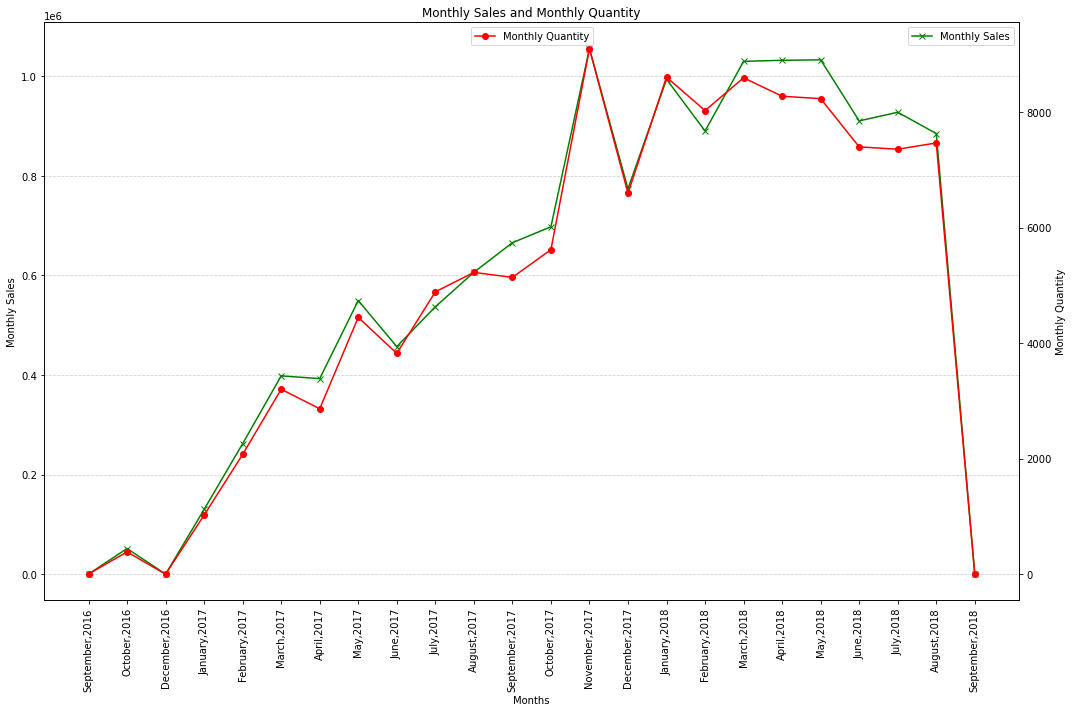

In [264]:
fig, ax = plt.subplots(figsize=(15,10))
ax2 = ax.twinx()
ax.set_title('Monthly Sales and Monthly Quantity')
ax.set_xlabel('Months')
ax.plot(mon_rev['Month'], mon_rev['Sales'], color='green', marker='x')
ax2.plot(mon_rev['Month'], mon_rev['Quantity'], color='red', marker='o')
ax.set_ylabel('Monthly Sales')
ax2.set_ylabel('Monthly Quantity')
ax.legend(['Monthly Sales'])
ax2.legend(['Monthly Quantity'], loc='upper center')
ax.set_xticks(mon_rev['Month'])
ax.set_xticklabels(mon_rev['Month'], rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

### weekly 

In [265]:
week = final.groupby(['order_purchase_timestamp','Monthly',
                      'Yearly'])[['price','product_id']].agg({'price':'sum',
                                                              'product_id':'count'}).reset_index()
week.columns = ['timestamp','Monthly','Yearly','Sales','Quantity']
week

,timestamp,Monthly,Yearly,Sales,Quantity
0,2016-09-04 21:15:00,September,2016,72.89,2
1,2016-09-05 00:15:00,September,2016,59.50,1
2,2016-10-02 22:07:00,October,2016,100.00,1
3,2016-10-03 09:44:00,October,2016,29.90,1
4,2016-10-03 16:56:00,October,2016,21.90,1
...,...,...,...,...,...
88151,2018-08-29 12:25:00,August,2018,63.90,1
88152,2018-08-29 14:18:00,August,2018,463.90,3
88153,2018-08-29 14:52:00,August,2018,24.90,1
88154,2018-08-29 15:00:00,August,2018,84.99,1


In [266]:
week['timestamp'] = week['timestamp'] - pd.to_timedelta(7, unit='d')
week

,timestamp,Monthly,Yearly,Sales,Quantity
0,2016-08-28 21:15:00,September,2016,72.89,2
1,2016-08-29 00:15:00,September,2016,59.50,1
2,2016-09-25 22:07:00,October,2016,100.00,1
3,2016-09-26 09:44:00,October,2016,29.90,1
4,2016-09-26 16:56:00,October,2016,21.90,1
...,...,...,...,...,...
88151,2018-08-22 12:25:00,August,2018,63.90,1
88152,2018-08-22 14:18:00,August,2018,463.90,3
88153,2018-08-22 14:52:00,August,2018,24.90,1
88154,2018-08-22 15:00:00,August,2018,84.99,1


In [267]:
weekly = week.groupby(['Yearly',pd.Grouper(key='timestamp', freq='W-MON')])[['Sales','Quantity']].sum().reset_index().sort_values('timestamp')
weekly

,Yearly,timestamp,Sales,Quantity
0,2016,2016-08-29,132.39,3
1,2016,2016-09-26,563.48,9
2,2016,2016-10-03,50905.43,377
3,2016,2016-12-19,10.90,1
4,2017,2017-01-02,6592.55,57
...,...,...,...,...
87,2018,2018-07-30,304583.04,2498
88,2018,2018-08-06,268841.68,2206
89,2018,2018-08-13,253469.83,2086
90,2018,2018-08-20,98828.48,997


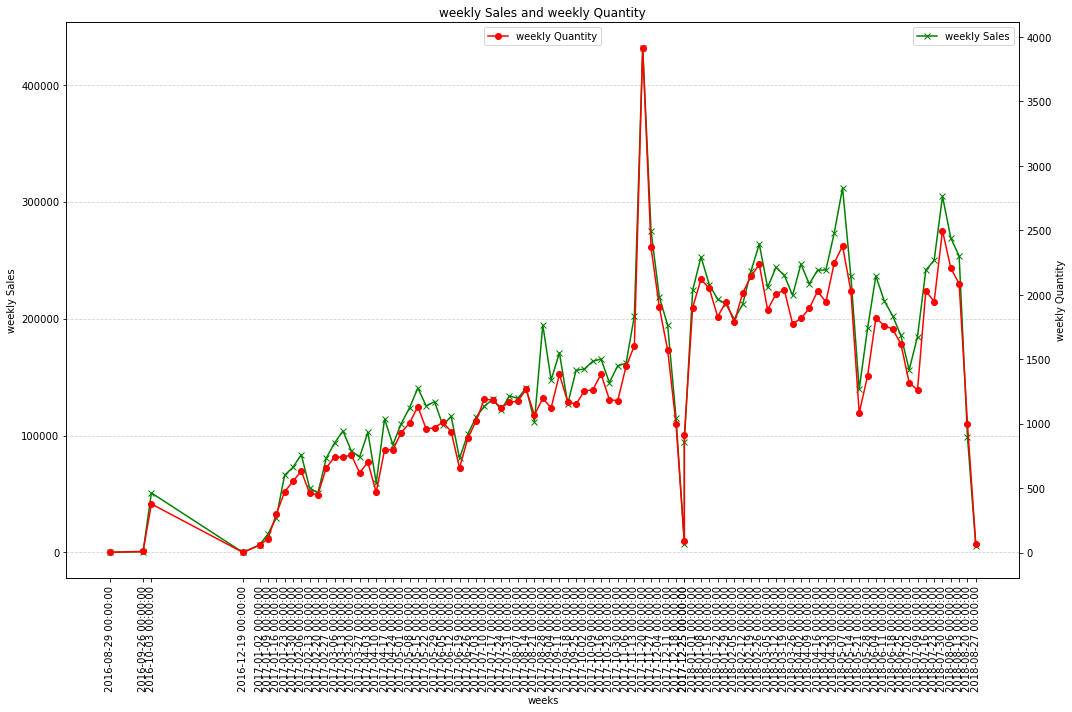

In [268]:
fig, ax = plt.subplots(figsize=(15,10))
ax2 = ax.twinx()
ax.set_title('weekly Sales and weekly Quantity')
ax.set_xlabel('weeks')
ax.plot(weekly['timestamp'], weekly['Sales'], color='green', marker='x')
ax2.plot(weekly['timestamp'], weekly['Quantity'], color='red', marker='o')
ax.set_ylabel('weekly Sales')
ax2.set_ylabel('weekly Quantity')
ax.legend(['weekly Sales'])
ax2.legend(['weekly Quantity'], loc='upper center')
ax.set_xticks(weekly['timestamp'])
ax.set_xticklabels(weekly['timestamp'], rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

### channel

In [269]:
# 
final['channel'] = final['customer_state'].astype(str) +"-"+ final['seller_state'].astype(str)

In [270]:
chanel = final.groupby(['channel'])[['price','product_id']].agg({'price':'sum','product_id':'count'}).reset_index()
chanel.columns = ['cust_seller_channel','Sales','Quantity']
chanel.sort_values('Quantity',ascending=False, inplace=True)
chanel

,cust_seller_channel,Sales,Quantity
0,Andhra Pradesh-Andhra Pradesh,5.577229e+06,49292
4,Andhra Pradesh-Gujarat,1.070786e+06,9368
81,Gujarat-Andhra Pradesh,7.294464e+05,6064
38,Chhattisgarh-Andhra Pradesh,6.430255e+05,5018
2,Andhra Pradesh-Chhattisgarh,4.951863e+05,3577
...,...,...,...
132,Himachal Pradesh-Orissa,1.699000e+02,1
318,Uttar Pradesh-Punjab,1.799900e+02,1
264,Punjab-Tamil Nadu,1.900000e+01,1
208,Madhya Pradesh-Punjab,5.900000e+02,1


In [271]:
# dropping the channels whoes quantity is less than 100
chanel = chanel[chanel['Quantity']>100]

<function matplotlib.pyplot.show(close=None, block=None)>

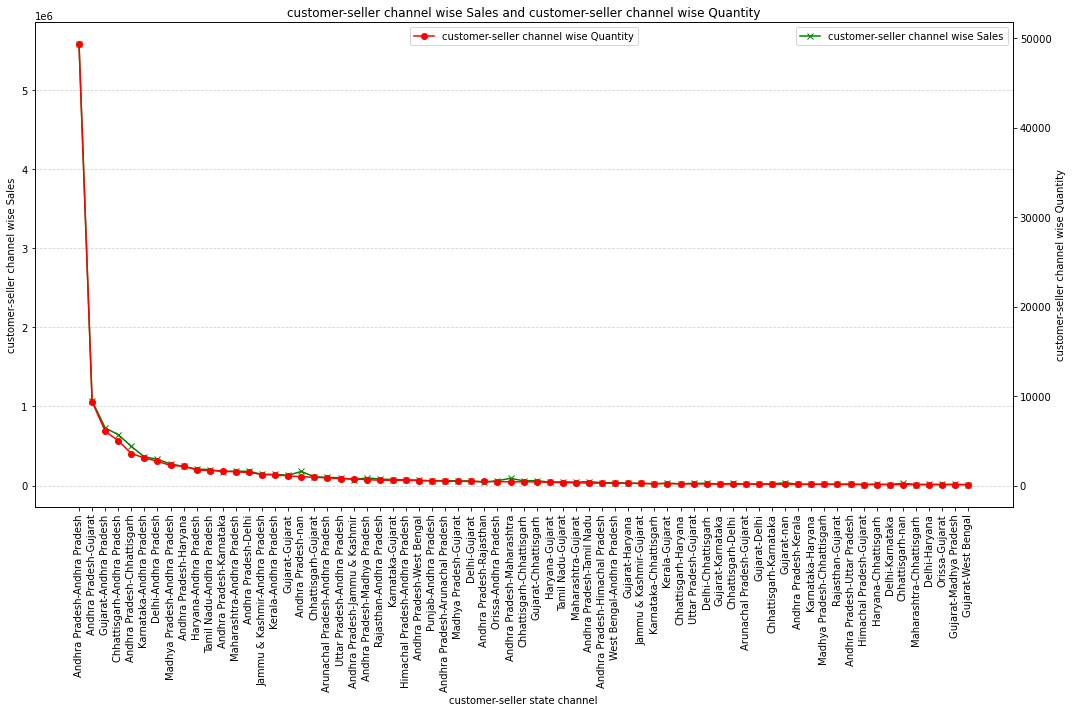

In [272]:
fig, ax = plt.subplots(figsize=(15,10))
ax2 = ax.twinx()
ax.set_title('customer-seller channel wise Sales and customer-seller channel wise Quantity')
ax.set_xlabel('customer-seller state channel')
ax.plot(chanel['cust_seller_channel'], chanel['Sales'], color='green', marker='x')
ax2.plot(chanel['cust_seller_channel'], chanel['Quantity'], color='red', marker='o')
ax.set_ylabel('customer-seller channel wise Sales')
ax2.set_ylabel('customer-seller channel wise Quantity')
ax.legend(['customer-seller channel wise Sales'])
ax2.legend(['customer-seller channel wise Quantity'], loc='upper center')
ax.set_xticks(chanel['cust_seller_channel'])
ax.set_xticklabels(chanel['cust_seller_channel'], rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show

### Payment method

In [273]:
Payment = final.groupby(['payment_type'])[['price','product_id']].agg({'price':'sum','product_id':'count'}).reset_index()
Payment.columns = ['payment_type','Sales','Quantity']
Payment.sort_values('Quantity',ascending=False, inplace=True)
Payment

,payment_type,Sales,Quantity
1,credit_card,1.101924e+07,87266
0,UPI,2.405984e+06,23018
3,voucher,6.652496e+05,6332
2,debit_card,1.843543e+05,1699


<function matplotlib.pyplot.show(close=None, block=None)>

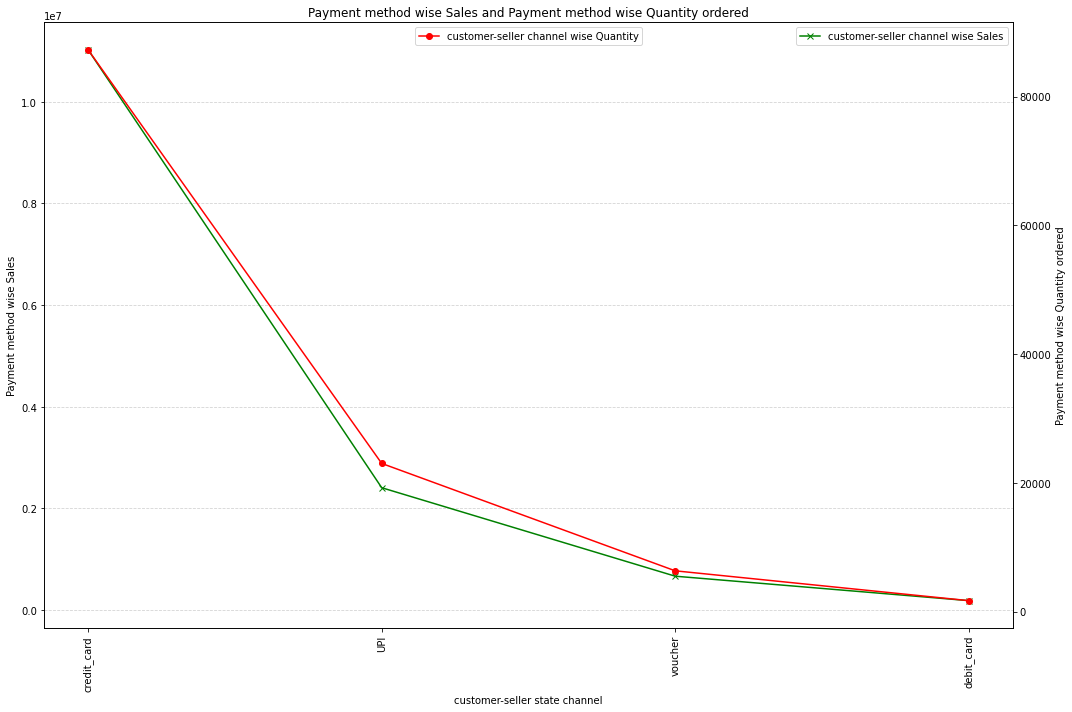

In [274]:
fig, ax = plt.subplots(figsize=(15,10))
ax2 = ax.twinx()
ax.set_title('Payment method wise Sales and Payment method wise Quantity ordered')
ax.set_xlabel('customer-seller state channel')
ax.plot(Payment['payment_type'], Payment['Sales'], color='green', marker='x')
ax2.plot(Payment['payment_type'], Payment['Quantity'], color='red', marker='o')
ax.set_ylabel('Payment method wise Sales')
ax2.set_ylabel('Payment method wise Quantity ordered')
ax.legend(['customer-seller channel wise Sales'])
ax2.legend(['customer-seller channel wise Quantity'], loc='upper center')
ax.set_xticks(Payment['payment_type'])
ax.set_xticklabels(Payment['payment_type'], rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show

# 1.f. Popular Products by month, seller, state, category.

### Popular Products by month

In [275]:
month_group = final.groupby(['Monthly','Yearly','product_id'])[['product_id']].count().add_prefix('cnt_').sort_values(by='cnt_product_id', ascending= False).reset_index()
month_group

,Monthly,Yearly,product_id,cnt_product_id
0,January,2018,aca2eb7d00ea1a7b8ebd4e68314663af,124
1,May,2018,53b36df67ebb7c41585e8d54d6772e08,115
2,November,2017,422879e10f46682990de24d770e7f83d,97
3,May,2018,aca2eb7d00ea1a7b8ebd4e68314663af,92
4,April,2018,aca2eb7d00ea1a7b8ebd4e68314663af,88
...,...,...,...,...
62170,January,2018,8a9efe06f7135fd2dfc7b84b30144bda,1
62171,January,2018,8aa1ba72d595bcf58ead2e5636f006cc,1
62172,January,2018,8aaeae26573fd33a2512d3fb0d8bea6f,1
62173,January,2018,8ab2bfb191a18b11427454a8419d01bc,1


In [276]:
top_3 = month_group.sort_values(['Yearly', 'Monthly','cnt_product_id', 'product_id'],
                  ascending=[True, True, False, False]).groupby(['Yearly', 'Monthly']
                                                                ,as_index = False,sort = False).nth([0,1,2])
top_3

,Monthly,Yearly,product_id,cnt_product_id
37805,December,2016,f5d8f4fbc70ca2a0038b9a0010ed5cb0,1
864,October,2016,eba7488e1c67729f045ab43fac426f2e,11
1743,October,2016,85b99d83c60cab5b4d8f927ad35212a1,7
2419,October,2016,d9894482fba41f536a273ba2276d951f,6
31038,September,2016,f3c2d01a84c947b078e32bbef0718962,1
...,...,...,...,...
29,March,2018,3dd2a17168ec895c781a9191c1e95ad7,51
1,May,2018,53b36df67ebb7c41585e8d54d6772e08,115
3,May,2018,aca2eb7d00ea1a7b8ebd4e68314663af,92
21,May,2018,422879e10f46682990de24d770e7f83d,56


In [277]:
order=['January','February','March','April','May','June','July','August','September','October','November','December']
f_1= top_3[top_3.Yearly=='2016']
f_2= top_3[top_3.Yearly=='2017']
f_3= top_3[top_3.Yearly=='2018']

f_1.index = pd.CategoricalIndex(data = f_1.Monthly,categories = order,ordered = True)
f_1 = f_1.sort_index()
f_2.index = pd.CategoricalIndex(data = f_2.Monthly,categories = order,ordered = True)
f_2 = f_2.sort_index()
f_3.index = pd.CategoricalIndex(data = f_3.Monthly,categories = order,ordered = True)
f_3 = f_3.sort_index()
top_3_monthly = pd.concat([f_1,f_2,f_3])
top_3_monthly.reset_index(drop = True, inplace=True)

top_3_monthly

,Monthly,Yearly,product_id,cnt_product_id
0,September,2016,f3c2d01a84c947b078e32bbef0718962,1
1,September,2016,f293394c72c9b5fafd7023301fc21fc2,1
2,September,2016,c1488892604e4ba5cff5b4eb4d595400,1
3,October,2016,eba7488e1c67729f045ab43fac426f2e,11
4,October,2016,85b99d83c60cab5b4d8f927ad35212a1,7
...,...,...,...,...
63,July,2018,19c91ef95d509ea33eda93495c4d3481,34
64,August,2018,19c91ef95d509ea33eda93495c4d3481,32
65,August,2018,73326828aa5efe1ba096223de496f596,56
66,August,2018,e7cc48a9daff5436f63d3aad9426f28b,75


In [278]:
print('top 3 popular products for every month:')
top_3_monthly

top 3 popular products for every month:


,Monthly,Yearly,product_id,cnt_product_id
0,September,2016,f3c2d01a84c947b078e32bbef0718962,1
1,September,2016,f293394c72c9b5fafd7023301fc21fc2,1
2,September,2016,c1488892604e4ba5cff5b4eb4d595400,1
3,October,2016,eba7488e1c67729f045ab43fac426f2e,11
4,October,2016,85b99d83c60cab5b4d8f927ad35212a1,7
...,...,...,...,...
63,July,2018,19c91ef95d509ea33eda93495c4d3481,34
64,August,2018,19c91ef95d509ea33eda93495c4d3481,32
65,August,2018,73326828aa5efe1ba096223de496f596,56
66,August,2018,e7cc48a9daff5436f63d3aad9426f28b,75


### By seller

### 10 most popular products by seller

In [279]:
seller_group = final.groupby(['seller_id','product_id'])[['product_id']].count().add_prefix('cnt_').sort_values(by='cnt_product_id', ascending= False).reset_index()
seller_group.head()

,seller_id,product_id,cnt_product_id
0,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,536
1,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,522
2,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,508
3,1f50f920176fa81dab994f9023523100,389d119b48cf3043d311335e499d9c6b,406
4,1f50f920176fa81dab994f9023523100,368c6c730842d78016ad823897a372db,398


In [280]:
top_2_per_seller = seller_group.sort_values(['seller_id','cnt_product_id', 'product_id'],
                  ascending=[True, False, False]).groupby(['seller_id']
                                                                ,as_index = False,sort = False).nth([0,1])
top_2_per_seller

,seller_id,product_id,cnt_product_id
8489,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
44,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,115
193,001cca7ae9ae17fb1caed9dfb1094831,e251ebd2858be1aa7d9b2087a6992580,48
26509,001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,1
892,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,17
...,...,...,...
7873,ffeee66ac5d5a62fe688b9d26f83f534,cd3b8a153ef3be4fdbad9e011b7b35e2,3
3896,fffd5413c0700ac820c7069d66d98c89,ebb12274522d82caa7dca657873b2ad7,6
4301,fffd5413c0700ac820c7069d66d98c89,ac850a749748b386d598124ae34ba1b0,5
14669,ffff564a4f9085cd26170f4732393726,dbd024d4182504993ad1e3cd2ee9d9e9,2


### 10 most popular products by state

In [281]:
state_group = final.groupby(['seller_state','product_id'])[['product_id']].count().add_prefix('cnt_').sort_values(by='cnt_product_id', ascending= False).reset_index()
state_group.head()

,seller_state,product_id,cnt_product_id
0,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,536
1,Gujarat,99a4788cb24856965c36a24e339b6058,528
2,Andhra Pradesh,422879e10f46682990de24d770e7f83d,508
3,Andhra Pradesh,389d119b48cf3043d311335e499d9c6b,406
4,Andhra Pradesh,368c6c730842d78016ad823897a372db,398


In [282]:
top_2_per_state = state_group.sort_values(['seller_state','cnt_product_id','product_id'],
                  ascending=[True, False, False]).groupby(['seller_state']
                                                                ,as_index = False,sort = False).nth([0,1])
top_2_per_state

,seller_state,product_id,cnt_product_id
0,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,536
2,Andhra Pradesh,422879e10f46682990de24d770e7f83d,508
89,Arunachal Pradesh,cec09725da5ed01471d9a505e7389d37,76
293,Arunachal Pradesh,5328338cfaa16ba10561cd970c73ca11,36
76,Chhattisgarh,437c05a395e9e47f9762e677a7068ce7,90
94,Chhattisgarh,5a6e53c3b4e8684b13388d6aa4afdf12,74
47,Delhi,08574b074924071f4e201e151b152b4e,115
86,Delhi,bee2e070c39f3dd2f6883a17a5f0da45,80
1,Gujarat,99a4788cb24856965c36a24e339b6058,528
16,Gujarat,35afc973633aaeb6b877ff57b2793310,189


### 10 most popular products by category

In [283]:
seller_group = final.groupby(['product_category_name','product_id'])[['product_id']].count().add_prefix('cnt_').sort_values(by='cnt_product_id', ascending= False).reset_index()
seller_group.head()

,product_category_name,product_id,cnt_product_id
0,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,536
1,Bed_Bath_Table,99a4788cb24856965c36a24e339b6058,528
2,Garden_Tools,422879e10f46682990de24d770e7f83d,508
3,Garden_Tools,389d119b48cf3043d311335e499d9c6b,406
4,Garden_Tools,368c6c730842d78016ad823897a372db,398


In [284]:
top_2_per_category = seller_group.sort_values(['product_category_name','cnt_product_id','product_id'],
                  ascending=[True, False, False]).groupby(['product_category_name'],as_index = False,sort = False).nth([0,1])
print('top 2 products per category:')
top_2_per_category

top 2 products per category:


,product_category_name,product_id,cnt_product_id
217,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,44
799,Agro_Industry_And_Commerce,423a6644f0aa529e8828ff1f91003690,19
945,Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb,17
1342,Air_Conditioning,ccb162ed569f47d83f62aebd5700d7ad,13
52,Art,4fe644d766c7566dbc46fb851363cb3b,109
...,...,...,...
87,Telephony,c9c6fde711572c1ad99ca12728c6af00,79
57,Toys,880be32f4db1d9f6e2bec38fb6ac23ab,106
73,Toys,b5e13c9a353102f79c6206ff5cb61a50,94
7,Watches_Gifts,53b36df67ebb7c41585e8d54d6772e08,327


# 1.g. Popular categories by state, month

### top 2 popular categories by state

In [285]:
state_cat = final.groupby(['customer_state', 'product_category_name'])[['customer_id']].count().sort_values(by='customer_id', ascending = False).reset_index()
state_cat.columns=['customer_state','product_category_name','cust_cnt']
state_cat

,customer_state,product_category_name,cust_cnt
0,Andhra Pradesh,Bed_Bath_Table,7736
1,Andhra Pradesh,Health_Beauty,6231
2,Andhra Pradesh,Furniture_Decor,5579
3,Andhra Pradesh,Sports_Leisure,5568
4,Andhra Pradesh,Computers_Accessories,5067
...,...,...,...
1071,Delhi,Music,1
1072,Maharashtra,Books_Imported,1
1073,Maharashtra,Art,1
1074,Goa,Auto,1


In [286]:
state_cat = state_cat.groupby(['customer_state'],as_index = False,sort = False).nth([0,1]).sort_values(by='customer_state')
state_cat

,customer_state,product_category_name,cust_cnt
0,Andhra Pradesh,Bed_Bath_Table,7736
1,Andhra Pradesh,Health_Beauty,6231
155,Arunachal Pradesh,Furniture_Decor,113
145,Arunachal Pradesh,Bed_Bath_Table,128
20,Chhattisgarh,Bed_Bath_Table,733
26,Chhattisgarh,Health_Beauty,632
53,Delhi,Bed_Bath_Table,314
50,Delhi,Health_Beauty,334
1036,Goa,Electronics,1
1037,Goa,Fashion_Male_Clothing,1


### Popular categories by Month

In [287]:
mon_cat = final.groupby(['Monthly','Yearly','product_category_name'])[['customer_id']].count().sort_values(by='customer_id', ascending = False).reset_index()
mon_cat.columns=['Monthly','Yearly','product_category_name','cust_cnt']
mon_cat.head()

,Monthly,Yearly,product_category_name,cust_cnt
0,November,2017,Bed_Bath_Table,1036
1,February,2018,Computers_Accessories,1021
2,January,2018,Bed_Bath_Table,920
3,June,2018,Health_Beauty,903
4,August,2018,Health_Beauty,878


In [288]:
mon_cat = mon_cat.groupby(['Monthly','Yearly'],as_index = False,sort = False).nth([0,1]).sort_values(by=['Monthly','Yearly'])
mon_cat.head()

,Monthly,Yearly,product_category_name,cust_cnt
118,April,2017,Bed_Bath_Table,313
174,April,2017,Sports_Leisure,225
13,April,2018,Bed_Bath_Table,776
16,April,2018,Health_Beauty,704
38,August,2017,Bed_Bath_Table,591


In [289]:
order=['January','February','March','April','May','June','July','August','September','October','November','December']
f_1= mon_cat[mon_cat.Yearly=='2016']
f_2= mon_cat[mon_cat.Yearly=='2017']
f_3= mon_cat[mon_cat.Yearly=='2018']

f_1.index = pd.CategoricalIndex(data = f_1.Monthly,categories = order,ordered = True)
f_1 = f_1.sort_index()

f_2.index = pd.CategoricalIndex(data = f_2.Monthly,categories = order,ordered = True)
f_2 = f_2.sort_index()
f_3.index = pd.CategoricalIndex(data = f_3.Monthly,categories = order,ordered = True)
f_3 = f_3.sort_index()
mon_cat = pd.concat([f_1,f_2,f_3])
mon_cat.reset_index(drop = True, inplace=True)
mon_cat

,Monthly,Yearly,product_category_name,cust_cnt
0,September,2016,Furniture_Decor,2
1,September,2016,Telephony,1
2,October,2016,Furniture_Decor,80
3,October,2016,Health_Beauty,50
4,December,2016,Fashion_Bags_Accessories,1
5,January,2017,Furniture_Decor,207
6,January,2017,Sports_Leisure,92
7,February,2017,Furniture_Decor,283
8,February,2017,Health_Beauty,185
9,March,2017,Bed_Bath_Table,323


# 1.h. List top 10 most expensive products sorted by price

In [290]:
final[['product_id','price']].sort_values( by = 'price', ascending=False).head(10)

,product_id,price
113823,489ae2aa008f021502940f251d4cce7f,6735.00
115630,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
104195,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
113387,a6492cc69376c469ab6f61d8f44de961,4799.00
113380,c3ed642d592594bb648ff4a04cee2747,4690.00
107929,259037a6a41845e455183f89c5035f18,4590.00
69397,a1beef8f3992dbd4cd8726796aa69c53,4399.87
91051,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
106300,dd113cb02b2af9c8e5787e8f1f0722f6,4059.00
29822,6902c1962dd19d540807d0ab8fade5c6,3999.90


# 2. Performing Customers/sellers Segmentation
# a. Divide the customers into groups based on the revenue generated 

In [291]:
import seaborn as sns

In [292]:
monetary_c = final.groupby(['customer_id'])[['payment_value']].sum().reset_index()
monetary_c

,customer_id,payment_value
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
98660,fffcb937e9dd47a13f05ecb8290f4d3e,91.91
98661,fffecc9f79fd8c764f843e9951b11341,81.36
98662,fffeda5b6d849fbd39689bb92087f431,63.13
98663,ffff42319e9b2d713724ae527742af25,214.13


In [293]:
retention

,index,customer_id,order_estimated_delivery_date,order_purchase_timestamp,Cohort,Lifetime
0,38185,6357fffb5704244d552615bbfcea1442,2017-10-11,2017-05-23 22:28:00,2017-05,5
1,68998,b279a1d441c73c1974d7a63618855aa0,2017-08-08,2017-03-16 02:30:00,2017-03,5
2,64015,a5fbb6579eacbeb02752a143bfe82405,2018-08-03,2018-03-06 09:47:00,2018-03,5
3,19574,32cef4bdd6bfa50612d81dc77a93b131,2018-07-12,2018-02-06 20:44:00,2018-02,5
4,57858,964253ff0e4e08180064764a450e521f,2017-07-04,2017-02-07 18:01:00,2017-02,5
...,...,...,...,...,...,...
98660,15760,28da029822232f74f6920cc4681ff5a8,2017-07-27,2017-07-07 17:28:00,2017-07,0
98661,21197,36d21d1f51cfe61bf8c909d95d93ad3c,2018-04-12,2018-04-01 12:59:00,2018-04,0
98662,24218,3ecddf921de5c14ec1f8bad33216e058,2017-07-21,2017-07-02 00:19:00,2017-07,0
98663,69320,b35f1a8faa9f7afd849b001e0b622972,2017-07-25,2017-07-01 19:23:00,2017-07,0


In [294]:
model = pd.merge(monetary_c, retention, on="customer_id")
model.drop( columns=['index','order_estimated_delivery_date','order_purchase_timestamp','Cohort'] , inplace=True)
model

,customer_id,payment_value,Lifetime
0,00012a2ce6f8dcda20d059ce98491703,114.74,1
1,000161a058600d5901f007fab4c27140,67.41,1
2,0001fd6190edaaf884bcaf3d49edf079,195.42,1
3,0002414f95344307404f0ace7a26f1d5,179.35,1
4,000379cdec625522490c315e70c7a9fb,107.01,0
...,...,...,...
98660,fffcb937e9dd47a13f05ecb8290f4d3e,91.91,1
98661,fffecc9f79fd8c764f843e9951b11341,81.36,1
98662,fffeda5b6d849fbd39689bb92087f431,63.13,1
98663,ffff42319e9b2d713724ae527742af25,214.13,0


In [295]:
frequency_product = final.groupby(['customer_id'])[['product_id']].count().add_prefix('freq_').sort_values(by='freq_product_id', 
                                                                                      ascending= False).reset_index()
frequency_product

,customer_id,freq_product_id
0,270c23a11d024a44c896d1894b261a83,63
1,13aa59158da63ba0e93ec6ac2c07aacb,38
2,9af2372a1e49340278e7c1ef8d749f34,29
3,92cd3ec6e2d643d4ebd0e3d6238f69e2,26
4,d22f25a9fadfb1abbc2e29395b1239f4,24
...,...,...
98660,5b96458c206829b9ccb7c7d27eabac68,1
98661,5b962d5aab4b7a6a145bf0bba32c1ae8,1
98662,5b9343b3c967f742d950e5b74e1f4ab6,1
98663,5b9227180f4dc629fe89b99a3b211dac,1


In [296]:
rfm_cust = pd.merge(model,frequency_product, on="customer_id")
rfm_cust.columns = ['customer_id','n_monetary','n_Recency','n_frequency']
rfm_cust1 = rfm_cust.drop(columns=['customer_id'])
rfm_cust1

,n_monetary,n_Recency,n_frequency
0,114.74,1,1
1,67.41,1,1
2,195.42,1,1
3,179.35,1,1
4,107.01,0,1
...,...,...,...
98660,91.91,1,1
98661,81.36,1,3
98662,63.13,1,1
98663,214.13,0,1


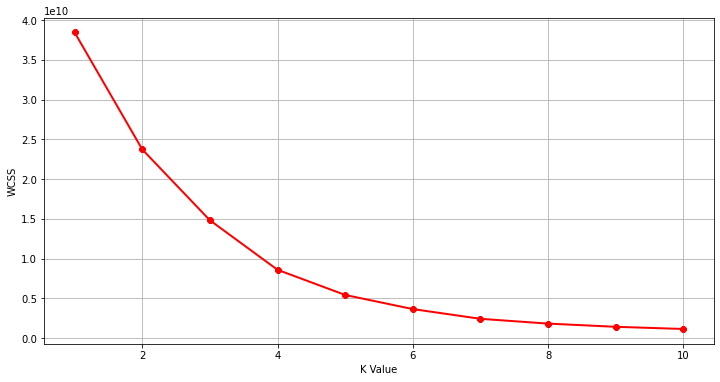

In [297]:
X1 = rfm_cust1.loc[:, ['n_monetary','n_Recency','n_frequency']].values

from sklearn.cluster import KMeans
WCSS=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters= k , init ="k-means++")
    kmeans.fit(X1)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11), WCSS, linewidth = 2, color='red', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [298]:
rfm_cust.describe()

,n_monetary,n_Recency,n_frequency
count,98665.000000,98665.000000,98665.000000
mean,206.945605,0.797993,1.199159
std,624.185201,0.498872,0.752200
min,9.590000,0.000000,1.000000
25%,62.920000,1.000000,1.000000
50%,110.320000,1.000000,1.000000
75%,196.600000,1.000000,1.000000
max,109312.640000,5.000000,63.000000


<AxesSubplot:>

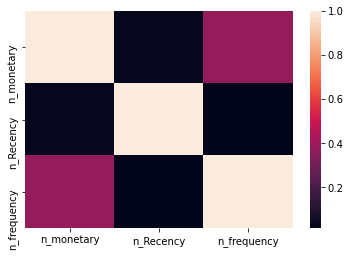

In [299]:
sns.heatmap(rfm_cust.iloc[:,0:].corr())

In [300]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfm_cust_normalized = pd.DataFrame(scaler.fit_transform(rfm_cust1))
rfm_cust_normalized.columns= ['n_monetary','n_Recency','n_frequency']
rfm_cust_normalized.describe()

,n_monetary,n_Recency,n_frequency
count,98665.000000,98665.000000,98665.000000
mean,0.001806,0.159599,0.003212
std,0.005711,0.099774,0.012132
min,0.000000,0.000000,0.000000
25%,0.000488,0.200000,0.000000
50%,0.000922,0.200000,0.000000
75%,0.001711,0.200000,0.000000
max,1.000000,1.000000,1.000000


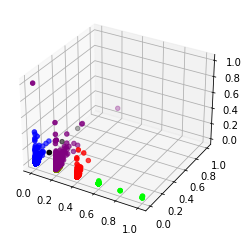

In [301]:
model = KMeans(n_clusters=5, random_state=12324).fit(rfm_cust_normalized)
centers = model.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(rfm_cust_normalized['n_Recency'], rfm_cust_normalized['n_monetary'], rfm_cust_normalized['n_frequency'], 
           cmap = 'brg', c=model.predict(rfm_cust_normalized))
ax.scatter(centers[:,0], centers[:,1], c='black')

C:\Users\Joshi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


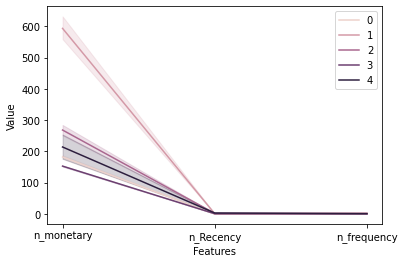

In [302]:
rfm_c= pd.DataFrame(scaler.inverse_transform(rfm_cust_normalized))
rfm_c.columns = rfm_cust1.columns
rfm_c['Customer_ID'] = rfm_cust1.index
rfm_c['Cluster'] = model.labels_

melted_rfm_cust_normalized = pd.melt(rfm_c.reset_index(),
                                    id_vars =['Customer_ID','Cluster'],
                                    value_vars = ['n_monetary','n_Recency','n_frequency'],
                                    var_name = 'Features',
                                    value_name = 'Value')
sns.lineplot('Features','Value',hue = 'Cluster', data=melted_rfm_cust_normalized)
plt.legend()

In [303]:
rfm_c.groupby('Cluster').agg({
    'n_monetary':['mean','min','max','count'],
    'n_Recency':['mean','min','max'],
    'n_frequency':['mean','min','max']
})

n_monetary                          n_Recency           n_frequency  \
               mean    min        max  count      mean  min  max        mean   
Cluster                                                                        
0        182.391345  10.07   22346.60  24149  0.000000  0.0  0.0    1.182823   
1        593.379370   9.59  109312.64   9379  0.999893  0.0  1.0    2.516686   
2        268.421837  12.39   19174.38   4072  2.000000  2.0  2.0    1.245825   
3        153.138941  10.89    6929.31  61000  1.000000  1.0  1.0    1.000000   
4        214.235692  32.42     860.20     65  3.261538  3.0  5.0    1.138462   

                    
         min   max  
Cluster             
0        1.0  26.0  
1        2.0  63.0  
2        1.0  21.0  
3        1.0   1.0  
4        1.0   3.0

# 2.b. Divide the sellers into groups based on the revenue generated 

In [304]:
monitory_seller = final.groupby(['seller_id'])[['payment_value']].sum().reset_index()
monitory_seller

,seller_id,payment_value
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,48349.22
2,001e6ad469a905060d959994f1b41e4f,267.94
3,002100f778ceb8431b7a1020ff7ab48f,2478.33
4,003554e2dce176b5555353e4f3555ac8,139.38
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,79.52
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,3607.52
3092,ffeee66ac5d5a62fe688b9d26f83f534,2259.55
3093,fffd5413c0700ac820c7069d66d98c89,12834.27


In [305]:
pvt_final = final.pivot_table(index= 'seller_id',
                  values=['order_purchase_timestamp','order_estimated_delivery_date'] ,
                  aggfunc={'order_purchase_timestamp':'min','order_estimated_delivery_date':'max'})
pvt_final.head()

pvt_final['Cohort'] = pvt_final.order_purchase_timestamp.map(lambda x: x.strftime('%Y-%m'))
pvt_final['Lifetime'] = (pvt_final.order_estimated_delivery_date.dt.year - pvt_final.order_purchase_timestamp.dt.year)*12 + (pvt_final.order_estimated_delivery_date.dt.month - pvt_final.order_purchase_timestamp.dt.month)
retention = pvt_final.reset_index().sort_values(['Cohort'])
retention.head(10)

retention_s = retention.sort_values(by='Lifetime', ascending=False).reset_index()
retention_s

,index,seller_id,order_estimated_delivery_date,order_purchase_timestamp,Cohort,Lifetime
0,246,1554a68530182680ad5c8b042c3ab563,2018-09-11,2016-09-04 21:15:00,2016-09,24
1,396,2138ccb85b11a4ec1e37afbd1c8eda1f,2018-10-15,2016-10-04 19:30:00,2016-10,24
2,2457,cab85505710c7cb9b720bceb52b01cee,2018-09-14,2016-10-08 04:01:00,2016-10,23
3,947,4e922959ae960d389249c378d1c939f5,2018-09-17,2016-10-10 17:49:00,2016-10,23
4,989,522620dcb18a6b31cd7bdf73665113a9,2018-09-05,2016-10-03 09:44:00,2016-10,23
...,...,...,...,...,...,...
3090,2313,c00396cbdd2e088fe4281baa5920aef1,2018-04-26,2018-04-04 14:36:00,2018-04,0
3091,549,2e2f44824ab87a0cb961f68bf4073e7f,2018-04-23,2018-04-02 21:10:00,2018-04,0
3092,1010,5305693ffae2d3463377b1f6fe67b15a,2018-01-24,2018-01-02 10:35:00,2018-01,0
3093,2909,f0ec6a2adb05c62655a26dd347b8dede,2018-04-23,2018-04-11 17:08:00,2018-04,0


In [306]:
model_s = pd.merge(monitory_seller, retention_s, on="seller_id")
model_s.drop( columns=['index','order_estimated_delivery_date','order_purchase_timestamp','Cohort'] , inplace=True)
model_s

,seller_id,payment_value,Lifetime
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06,2
1,001cca7ae9ae17fb1caed9dfb1094831,48349.22,18
2,001e6ad469a905060d959994f1b41e4f,267.94,0
3,002100f778ceb8431b7a1020ff7ab48f,2478.33,8
4,003554e2dce176b5555353e4f3555ac8,139.38,1
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,79.52,1
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,3607.52,17
3092,ffeee66ac5d5a62fe688b9d26f83f534,2259.55,9
3093,fffd5413c0700ac820c7069d66d98c89,12834.27,14


In [307]:
frequency_product = final.groupby(['seller_id'])[['product_id']].count().add_prefix('freq_').sort_values(by='freq_product_id', 
                                                                                      ascending= False).reset_index()
frequency_product

,seller_id,freq_product_id
0,4a3ca9315b744ce9f8e9374361493884,2155
1,6560211a19b47992c3666cc44a7e94c0,2130
2,1f50f920176fa81dab994f9023523100,2017
3,cc419e0650a3c5ba77189a1882b7556a,1893
4,da8622b14eb17ae2831f4ac5b9dab84a,1662
...,...,...
3090,d4828feed4cda2cd9d6b37899a95a71e,1
3091,d4d99b60c4c94cd35acd502cec65dc8d,1
3092,5f57db27027655e6c6a391601daa0258,1
3093,d4f91e8be86b38da2ee35bc489645a9d,1


In [308]:
rfm_seller = pd.merge(model_s,frequency_product, on="seller_id")
rfm_seller.columns = ['seller_id','n_monetary','n_Recency','n_frequency']
rfm_seller1 = rfm_seller.drop(columns=['seller_id'])
rfm_seller1

,n_monetary,n_Recency,n_frequency
0,2748.06,2,3
1,48349.22,18,241
2,267.94,0,1
3,2478.33,8,59
4,139.38,1,1
...,...,...,...
3090,79.52,1,1
3091,3607.52,17,21
3092,2259.55,9,14
3093,12834.27,14,62


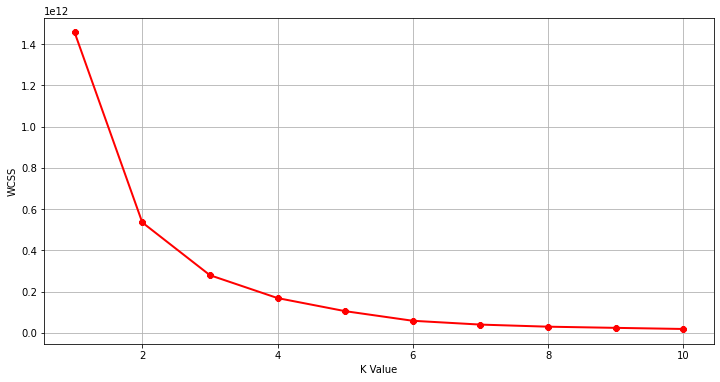

In [309]:
X1 = rfm_seller1.loc[:, ['n_monetary','n_Recency','n_frequency']].values

from sklearn.cluster import KMeans
WCSS=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters= k , init ="k-means++")
    kmeans.fit(X1)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11), WCSS, linewidth = 2, color='red', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [310]:
rfm_seller1.describe()

,n_monetary,n_Recency,n_frequency
count,3095.000000,3095.000000,3095.000000
mean,6597.185186,6.542488,38.227787
std,21698.456263,5.976093,125.394406
min,12.220000,0.000000,1.000000
25%,320.500000,2.000000,2.000000
50%,1255.710000,4.000000,8.000000
75%,4884.675000,10.000000,26.000000
max,512645.190000,24.000000,2155.000000


<AxesSubplot:>

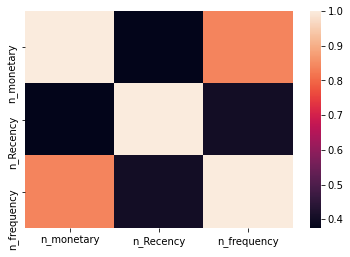

In [311]:
sns.heatmap(rfm_seller1.iloc[:,0:].corr())

In [312]:
scaler = MinMaxScaler()
rfm_seller_normalized = pd.DataFrame(scaler.fit_transform(rfm_seller1))
rfm_seller_normalized.columns= ['n_monetary','n_Recency','n_frequency']
rfm_seller_normalized.describe()

,n_monetary,n_Recency,n_frequency
count,3095.000000,3095.000000,3095.000000
mean,0.012845,0.272604,0.017283
std,0.042327,0.249004,0.058215
min,0.000000,0.000000,0.000000
25%,0.000601,0.083333,0.000464
50%,0.002426,0.166667,0.003250
75%,0.009505,0.416667,0.011606
max,1.000000,1.000000,1.000000


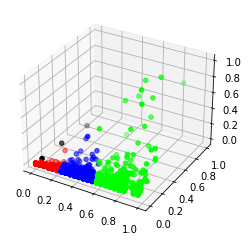

In [313]:
model_s = KMeans(n_clusters=3, random_state=12324).fit(rfm_seller_normalized)
centers = model_s.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(rfm_seller_normalized['n_Recency'], rfm_seller_normalized['n_monetary'], rfm_seller_normalized['n_frequency'], 
           cmap = 'brg', c=model_s.predict(rfm_seller_normalized))
ax.scatter(centers[:,0], centers[:,1], c='black')

C:\Users\Joshi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


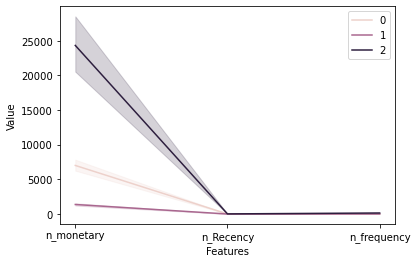

In [314]:
rfm_s = pd.DataFrame(scaler.inverse_transform(rfm_seller_normalized))
rfm_s.columns = rfm_seller1.columns
rfm_s['Seller_ID'] = rfm_seller1.index
rfm_s['Cluster'] = model_s.labels_

melted_rfm_seller_normalized = pd.melt(rfm_s.reset_index(),
                                    id_vars =['Seller_ID','Cluster'],
                                    value_vars = ['n_monetary','n_Recency','n_frequency'],
                                    var_name = 'Features',
                                    value_name = 'Value')
sns.lineplot('Features','Value',hue = 'Cluster', data=melted_rfm_seller_normalized)
plt.legend()

In [315]:
rfm_s.groupby('Cluster').agg({
    'n_monetary':['mean','min','max','count'],
    'n_Recency':['mean','min','max'],
    'n_frequency':['mean','min','max']})

n_monetary                           n_Recency              \
                 mean     min        max count       mean   min   max   
Cluster                                                                 
0         7010.033271   74.86  129169.98   856   9.063084   6.0  13.0   
1         1375.228206   12.22   64762.56  1745   2.181662   0.0   5.0   
2        24327.786336  240.44  512645.19   494  17.578947  13.0  24.0   

        n_frequency               
               mean  min     max  
Cluster                           
0         39.052570  2.0  1031.0  
1          6.756447  1.0   354.0  
2        147.967611  2.0  2155.0

# 3. Cross-Selling (Which products are selling together)
# Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

In [316]:
#tt = pd.crosstab(index = final.order_id ,columns = final.product_category_name)
#tt['total'] = tt.sum(axis=1)
#tt.sort_values(by ='total', inplace=True, ascending=False)
#tt

In [317]:
tt1 = pd.crosstab(index = final.order_id ,columns = final.product_category_name)

In [318]:
tt1['cnt'] = tt1.astype(bool).sum(axis=1)
tt1.sort_values(by ='cnt', inplace=True, ascending=False)
tt1

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts,cnt
order_id,,,,,,,,,,,,,,,,,,,,,
d4bec1a24c97bd17be18d77297a0f6a0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
d839ea07a528e914f89702508023da37,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
62ce4e3989a3477928510bb4d1064cc4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
91be51c856a90d7efe86cf9d082d6ae3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
76c4c846aae2dae9e87dfa492c3f5259,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55aeba08a7d54fd54220244c4dfdb559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
55aea3ae93b247a771d01bc39ae5ec45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55adc5cef9556477770f0b858669f8fc,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,1


### top 10 orders where cross selling happepened

In [319]:
tt1 = tt1.loc[tt1.cnt == 3,:]

In [320]:
top_10 = tt1.head(10)

In [321]:
top_10.loc[:, (top_10 != 0).any(axis=0)]

product_category_name,Auto,Baby,Bed_Bath_Table,Cine_Photo,Computers_Accessories,Construction_Tools_Lights,Cool_Stuff,Furniture_Decor,Garden_Tools,Home_Confort,Home_Construction,Housewares,Telephony,Watches_Gifts,cnt
order_id,,,,,,,,,,,,,,,
d4bec1a24c97bd17be18d77297a0f6a0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,3
d839ea07a528e914f89702508023da37,0,0,1,0,0,0,0,1,0,2,0,0,0,0,3
62ce4e3989a3477928510bb4d1064cc4,0,0,0,0,0,0,0,3,0,0,1,2,0,0,3
91be51c856a90d7efe86cf9d082d6ae3,0,0,0,2,0,0,1,0,0,0,0,0,1,0,3
76c4c846aae2dae9e87dfa492c3f5259,0,0,1,0,0,1,0,0,1,0,0,0,0,0,3
e8c92cfd87f5f0c6d2fc5bc1df5f02b4,1,0,1,0,0,0,1,0,0,0,0,0,0,0,3
1d23106803c48c391366ff224513fb7f,0,1,2,0,0,0,0,1,0,0,0,0,0,0,3
a98012aa8c697f2bcff9f8c2183e0f2b,0,0,0,0,3,0,1,0,0,0,1,0,0,0,3
3040863957c9336e7389512584639bb5,0,0,0,0,0,0,0,1,0,0,0,1,0,1,3


In [322]:
# I wanted to create a combination of these products out of 97255 rows ie. i wanted to group the unique 
# combination of products and there count to find which combination of product are sod the ost together.

# 4. Payment Behaviour
# 4.a. How customers are paying?

In [323]:
payment_behaviour = final.groupby(['payment_sequential','payment_type','payment_installments'])[['payment_type']].count().add_prefix('no_').reset_index()
payment_behaviour.columns= ['payment_sequential','payment_type','payment_installments','customer_count']
payment_behaviour

,payment_sequential,payment_type,payment_installments,customer_count
0,1,UPI,1,23017
1,1,credit_card,1,27786
2,1,credit_card,2,13709
3,1,credit_card,3,11790
4,1,credit_card,4,7983
...,...,...,...,...
63,25,voucher,1,2
64,26,voucher,1,2
65,27,voucher,1,1
66,28,voucher,1,1


In [324]:
# there are 68 ways of payment methods based on combination of 'payment_sequential', 'payment_type', 'payment_installments' 
# through which the customers are paying

# 4.b. Which payment channels are used by most customers?

In [325]:
top_payment_channel = final.groupby(['payment_type'])[['payment_type']].count().add_prefix('cnt_').sort_values(by='cnt_payment_type', ascending=False).reset_index()
top_payment_channel

,payment_type,cnt_payment_type
0,credit_card,87266
1,UPI,23018
2,voucher,6332
3,debit_card,1699


In [326]:
# mostly the customers use credit_card

# 5. Customer satisfaction towards category & product
# 5.a. Which categories (top 10) are maximum rated & minimum rated?

In [327]:
maximum10_cat = final.groupby(['product_category_name'])[['review_score']].mean().sort_values(by='review_score', ascending = False).reset_index().head(10)
minimum10_cat = final.groupby(['product_category_name'])[['review_score']].mean().sort_values(by='review_score', ascending = True).reset_index().head(10)

In [328]:
maximum10_cat

,product_category_name,review_score
0,Cds_Dvds_Musicals,4.642857
1,Fashion_Childrens_Clothes,4.500000
2,Books_General_Interest,4.431858
3,Books_Imported,4.419355
4,Books_Technical,4.345588
5,Costruction_Tools_Tools,4.333333
6,Small_Appliances_Home_Oven_And_Coffee,4.320513
7,Food_Drink,4.312715
8,Luggage_Accessories,4.290628
9,Fashion_Sport,4.258065


In [329]:
minimum10_cat

,product_category_name,review_score
0,Security_And_Services,2.500000
1,Diapers_And_Hygiene,3.256410
2,Home_Comfort_2,3.387097
3,Office_Furniture,3.516779
4,Fashion_Male_Clothing,3.531034
5,Fixed_Telephony,3.661765
6,Fashio_Female_Clothing,3.780000
7,Furniture_Mattress_And_Upholstery,3.804878
8,Audio,3.824147
9,Construction_Tools_Safety,3.834171


# 5.b. Which products (top10) are maximum rated & minimum rated?

In [330]:
final.product_id.nunique()

32951

In [331]:
final.groupby(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])[['product_id']].count()

product_id
product_name_lenght product_description_lenght product_photos_qty product_weight_g product_length_cm product_height_cm product_width_cm            
5.0                 267.0                      1.0                2600.0           18.0              40.0              13.0                       8
                    310.0                      1.0                7050.0           88.0              29.0              29.0                       1
6.0                 254.0                      1.0                2400.0           50.0              15.0              17.0                       3
7.0                 289.0                      1.0                2300.0           65.0              15.0              15.0                       1
                    356.0                      4.0                20700.0          60.0              43.0              48.0                       1
...                                                                                                                                             ...
67.0                348.0                      1.0                250.0            16.0              16.0              12.0                       3
68.0                318.0                      1.0                21200.0          45.0              15.0              25.0                       1
69.0                918.0                      1.0                50.0             22.0              3.0               15.0                       1
72.0                401.0                      1.0                1150.0           45.0              15.0              35.0                       9
76.0                805.0                      2.0                350.0            16.0              11.0              11.0                       1

[31737 rows x 1 columns]

In [332]:
maximum10_prod = final.groupby(['product_id'])[['review_score']].mean().sort_values(by='review_score', ascending = False).reset_index().head(10)
minimum10_prod = final.groupby(['product_id'])[['review_score']].mean().sort_values(by='review_score', ascending = True).reset_index().head(10)

In [333]:
maximum10_prod

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,86743ff92eee3d16b7df59cddd583b8c,5.0
2,868ceb027ab706a4dee42e2220006b85,5.0
3,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
4,868766ed2172644fdd977d6bd395a107,5.0
5,8684bd8f93b4f4038d07188a23811e93,5.0
6,867c96d2bb67aba6500a4c509cf76072,5.0
7,867b820367ec206b38a357f2c12454b7,5.0
8,867901d7e8488fb97f1fb538c09d476e,5.0
9,865bfa00c1dad8f4146d3c2765f051ca,5.0


In [334]:
minimum10_prod

,product_id,review_score
0,592cc6634d2c783d297effc0b828bc37,1.0
1,482c25dc8512547962854dfff5ac057b,1.0
2,e10c5041c0752194622a7a7016d8c9b5,1.0
3,47fafa6908e75ae62b8a36a9eb3b9234,1.0
4,47d85e3e35a3e29f93fdc12b295d520c,1.0
5,47d6209a0b169cc800b0a45a9127d2f2,1.0
6,47cad419b0ad5dc9d2305bf795c3c16f,1.0
7,47b49b876c60eafde72f0e1c602f386d,1.0
8,47b0f8596ee6dafbb4438cac16fa6275,1.0
9,47ac4dcdb04867daeaad647d224389e4,1.0


# 5.c. Average rating by location, seller, product, category, month Etc.

In [335]:
final.groupby(['customer_state'])[['review_score']].mean().add_prefix('mean_')

,mean_review_score
customer_state,
Andhra Pradesh,3.995275
Arunachal Pradesh,4.024242
Chhattisgarh,4.031524
Delhi,4.029000
Goa,4.800000
Gujarat,4.037570
Haryana,4.117066
Himachal Pradesh,3.988399
Jammu & Kashmir,3.998362


In [336]:
final.groupby(['seller_state'])[['review_score']].mean().add_prefix('mean_')

,mean_review_score
seller_state,
Andhra Pradesh,4.020926
Arunachal Pradesh,4.146280
Chhattisgarh,4.120547
Delhi,3.890128
Gujarat,3.928975
Haryana,4.077616
Himachal Pradesh,4.161987
Jammu & Kashmir,4.035601
Karnataka,4.036440


In [337]:
final.groupby(['seller_id'])[['review_score']].mean().add_prefix('mean_').sort_values(by = 'mean_review_score', ascending = False)

,mean_review_score
seller_id,
c18309219e789960add0b2255ca4b091,5.0
2075d8cd4dd63ff12df0749a5866bb06,5.0
40ec8ab6cdafbcc4f544da38c67da39a,5.0
4125d9385a25e82d2f72d3a0fd55bc3f,5.0
417a1e6c7321084d2a0ae0d023cfad93,5.0
...,...
f524ad65d7e0f1daab730ef2d2e86196,1.0
749e7cdabbaf72f16677859e27874ba5,1.0
f5403d3f50089112c4eed37928b7f622,1.0


In [338]:
final.groupby(['product_category_name'])[['review_score']].mean().add_prefix('mean_').sort_values(by = 'mean_review_score',ascending= False)

,mean_review_score
product_category_name,
Cds_Dvds_Musicals,4.642857
Fashion_Childrens_Clothes,4.500000
Books_General_Interest,4.431858
Books_Imported,4.419355
Books_Technical,4.345588
...,...
Fashion_Male_Clothing,3.531034
Office_Furniture,3.516779
Home_Comfort_2,3.387097


In [339]:
mon = final.groupby(['Monthly','Yearly'])[['review_score']].mean().add_prefix('mean_').sort_values(by = 'mean_review_score',ascending= False).reset_index()

In [340]:
#sorting chronologically
order=['January','February','March','April','May','June','July',
       'August','September','October','November','December']

month_rev_1= mon[mon.Yearly=='2016']
month_rev_2= mon[mon.Yearly=='2017']
month_rev_3= mon[mon.Yearly=='2018']
month_rev_1.index = pd.CategoricalIndex(data = month_rev_1.Monthly,
                                            categories = order,
                                            ordered = True)
month_rev_1 = month_rev_1.sort_index()
month_rev_2.index = pd.CategoricalIndex(data = month_rev_2.Monthly,
                                            categories = order,
                                            ordered = True)
month_rev_2 = month_rev_2.sort_index()
month_rev_3.index = pd.CategoricalIndex(data = month_rev_3.Monthly,
                                            categories = order,
                                            ordered = True)
month_rev_3 = month_rev_3.sort_index()
mon_rev = pd.concat([month_rev_1,month_rev_2,month_rev_3])
mon_rev.reset_index(drop = True, inplace=True)
#mon_rev.columns = ['Monthly','Yearly','Sales','Quantity']
mon_rev

,Monthly,Yearly,mean_review_score
0,September,2016,1.000000
1,October,2016,3.585492
2,December,2016,5.000000
3,January,2017,4.087977
4,February,2017,4.041003
5,March,2017,4.049360
6,April,2017,3.959497
7,May,2017,4.117210
8,June,2017,4.117216
9,July,2017,4.108042
